In [1]:
# set parameter and csv file path

is_need_preprocessing = True
csv_file_path = 'asdf_single_log_long.csv'
file_name =  csv_file_path.split("/")[-1]

save_params = True

In [2]:
# ignore warnings

import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [3]:
import numpy as np
import pandas as pd

In [4]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

if is_need_preprocessing:

    x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
    y_names = ['a', 's', 'd', 'f', 'None']

    col_names = x_names + y_names

    df = pd.read_csv(csv_file_path, names=col_names)
    df.head()

In [5]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

if is_need_preprocessing:
    y_names_origin = ['a', 's', 'd', 'f']

    for row in range(len(df)):
        df['None'].iloc[row] = 1
        for value in df[y_names_origin].iloc[row]:
            if value == 1:
                df['None'].iloc[row] = 0
                break

In [6]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음

if is_need_preprocessing:
    import sys, os
    sys.path.append(os.pardir)

    from visualization.smoother import gamma_smoothing, average_smoothing

    df = gamma_smoothing(df)  # takes about 1 min
    # df = average_smoothing(df)
    df.head()

In [7]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음
# normalization, about 1 min

if is_need_preprocessing:
	from sklearn.preprocessing import MinMaxScaler
	scaler = MinMaxScaler()

	for column in x_names:
		df_column = df[column]
		df_column = df_column.values.reshape(-1, 1)
		df_column = scaler.fit_transform(df_column)

		for row in range(len(df)):
			df[column].iloc[row] = df_column[row]


In [10]:
# asdf_single_space_log_preprocessing.csv를 이용해 데이터 전처리 과정을 스킵할 수 있음
# 원본 데이터 전처리 한 것 csv 로 저장

if is_need_preprocessing:

    import pandas as pd
    from pandas import DataFrame

    df.to_csv(csv_file_path.replace(".csv", "_preprocessing.csv"), sep=",", index=False, header=False)

In [11]:
# asdf_single_space_log_preprocessing.csv를 이용해 전처리 과정 스킵하고 바로 불러오기

if not is_need_preprocessing:
    file_path = csv_file_path

    x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
    y_names = ['a', 's', 'd', 'f', 'None']

    col_names = x_names + y_names

    df = pd.read_csv(csv_file_path, names=col_names)
    df.head()


In [12]:
# x, y split
x, y = df[x_names], df[y_names]

In [13]:
# train, test split
train_test_ratio = 0.90

train_num = int(len(df) * train_test_ratio)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

# train_test_ratio = 0.2

# train_num = int(len(df) * 0.2)

# x_train, x_test = x[train_num:], x[:train_num]
# y_train, y_test = y[train_num:], y[:train_num]

In [14]:
# apply mlp

import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(63,)),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
  ])

model.compile(optimizer='adam',
                loss=tf.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])


In [15]:
model.fit(x_train, y_train, epochs=100)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/100
127/127 [==============================] - 1s 976us/step - loss: 1.4150 - accuracy: 0.4495
Epoch 2/100
127/127 [==============================] - 0s 849us/step - loss: 1.0527 - accuracy: 0.6543
Epoch 3/100
127/127 [==============================] - 0s 905us/step - loss: 0.8318 - accuracy: 0.7330
Epoch 4/100
127/127 [==============================] - 0s 889us/step - loss: 0.6954 - accuracy: 0.7811
Epoch 5/100
127/127 [==============================] - 0s 921us/step - loss: 0.5943 - accuracy: 0.8079
Epoch 6/100
127/127 [==============================] - 0s 929us/step - loss: 0.5284 - accuracy: 0.8217
Epoch 7/100
127/127 [==============================] - 0s 897us/step - loss: 0.4863 - accuracy: 0.8267
Epoch 8/100
127/127 [==============================] - 0s 873us/step - loss: 0.4607 - accuracy: 0.8417
Epoch 9/100
127/127 [==============================] - 0s 841us/step - loss: 0.4435 - accuracy: 0.8437
Epoch 10/100
127/127 [==============================] - 0s 881us/step - l

[0.4654777944087982, 0.8713968992233276]

In [16]:
# 데이터 셋 디렉토리에 체크포인트 저장
if save_params:
    model.save_weights(csv_file_path.rstrip(file_name) + "checkpoints/" + file_name)


# # 모델 가중치를 복원 할 때는
# model = create_model()
# model.load_weights(csv_file_path.rstrip(file_name) + "checkpoints/" + file_name)

In [17]:
predict = model.predict(x_test)

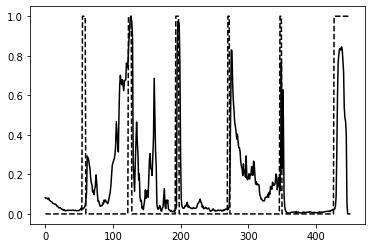

In [18]:
import matplotlib.pyplot as plt

size = len(y_test)

plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

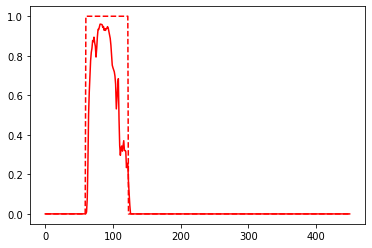

In [19]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')


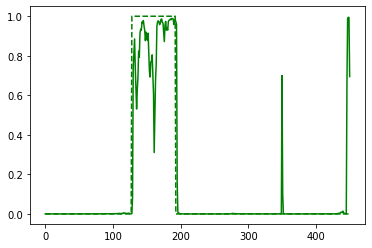

In [20]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

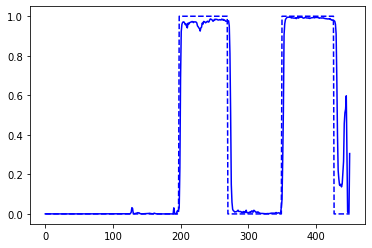

In [21]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

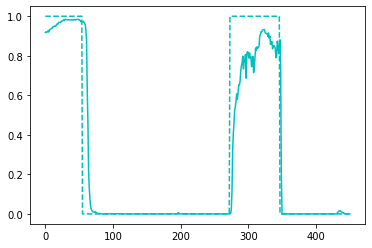

In [22]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')

In [23]:
def up_sensivity(data, sensivity=2):

    denominator = (sensivity * sum(data) - (sensivity - 1)* data[4])
    
    data[0], data[1], data[2], data[3], data[4] = (
    sensivity * data[0] / denominator,
    sensivity * data[1] / denominator,
    sensivity * data[2] / denominator,
    sensivity * data[3] / denominator,
    data[4] / denominator
    )

    return data
    

In [24]:
for row in range(len(predict)):
    predict[row] = up_sensivity(predict[row], 3)

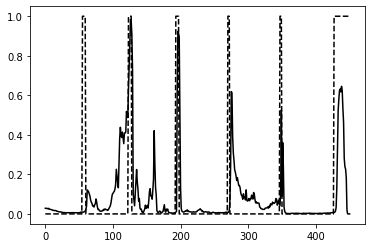

In [25]:
plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

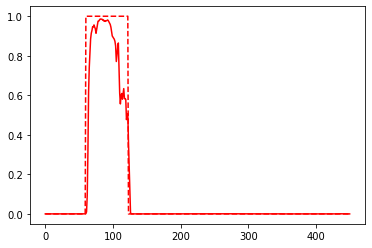

In [26]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')

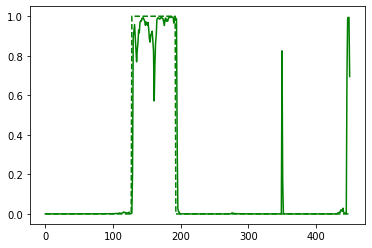

In [27]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

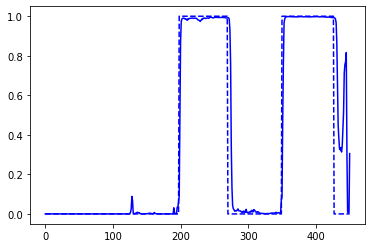

In [28]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

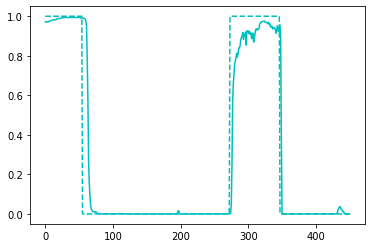

In [29]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')